
1- Data Collection Amazon Sales Data Analysis


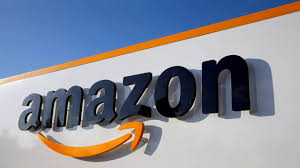

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('amazon.csv')

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


The dataset includes details such as product name, category, price, rating, and user reviews :

product_id - Product ID

product_name - Name of the Product

category - Category of the Product

discounted_price - Discounted Price of the Product

actual_price - Actual Price of the Product

discount_percentage - Percentage of Discount for the Product

rating - Rating of the Product

rating_count - Number of people who voted for the Amazon rating

about_product - Description about the Product

user_id - ID of the user who wrote review for the Product

user_name - Name of the user who wrote review for the Product

review_id - ID of the user review

review_title - Short review

review_content - Long review

img_link - Image Link of the Product

product_link - Official Website Link of the Product

In [5]:
df.shape


(1465, 16)

In [6]:
# Checking for missing values
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))
df[df.rating_count.isnull()]

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


To remove rows with missing information, we'll use the dropna() function. We only want to keep rows with all the required information because missing values can affect the accuracy of our analysis. In this case, we will remove the two rows that contain blank values for rating_count.

In [7]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=['rating_count'], inplace=True)
print(check_missing_values(df))

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [8]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [9]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


Some variables in a dataset may have an object data type, which means they are strings. In order to perform numerical analysis on these variables, we need to convert them to numeric values.

In [10]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [11]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [12]:
df.query('rating == "|"')


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [13]:
#Here there is no rating so i have presumed it to be 4 and replaced it
df['rating'] = df['rating'].str.replace('|', '4').astype('float64')
df['rating'] = df['rating'].astype('float64')

In [14]:
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)


In [15]:
print(check_data_types(df))


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [16]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

As the Category column is lengthy we have used split function seperate the strings and store them in a new variable

In [17]:
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'sub_category',
       'main_category'],
      dtype='object')

In [18]:
len(df)


1463

In [20]:
Q1 = df['rating_count'].quantile(0.25)
Q3 = df['rating_count'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR
# Identify outliers
outliers = (df['rating_count'] < lower_limit) | (df['rating_count'] > upper_limit)
df.loc[outliers,['product_id','product_name','category','discounted_price','actual_price','discount_percentage','rating','rating_count']].T

,1,3,8,9,11,12,17,30,40,47,...,1015,1022,1027,1028,1031,1032,1045,1077,1130,1145
product_id,B098NS6PVG,B08HDJ86NZ,B008IFXQFU,B082LZGK39,B0789LZTCJ,B07KSMBL2H,B082LSVT4B,B00NH11PEY,B00NH11KIK,B014I8SSD0,...,B078W65FJ7,B07WMS7TWB,B07VQGVL68,B01LWYDEQ7,B01MQZ7J8K,B01GFTEV5Y,B09X5C9VLK,B008YW8M0G,B0756K5DYZ,B0BR4F878Q
product_name,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,boAt Rugged v3 Extra Tough Unbreakable Braided...,AmazonBasics Flexible Premium HDMI Cable (Blac...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,AmazonBasics USB 2.0 - A-Male to A-Female Exte...,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",...,boAt BassHeads 900 On-Ear Wired Headphones wit...,Pigeon by Stovekraft Amaze Plus Electric Kettl...,Glun Multipurpose Portable Electronic Digital ...,Pigeon Polypropylene Mini Handy and Compact Ch...,"Prestige Electric Kettle PKOSS - 1500watts, St...",Pigeon by Stovekraft Cruise 1800 watt Inductio...,Lifelong LLMG23 Power Pro 500-Watt Mixer Grind...,Bajaj DX-7 1000W Dry Iron with Advance Solepla...,Prestige Iris 750 Watt Mixer Grinder with 3 St...,Swiffer Instant Electric Water Heater Faucet T...
category,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|NetworkingDevices|Networ...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,"Electronics|HomeTheater,TV&Video|Accessories|C...",Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,"Electronics|HomeTheater,TV&Video|Accessories|C...",...,"Electronics|Headphones,Earbuds&Accessories|Hea...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH..."
discounted_price,199.0,329.0,499.0,199.0,299.0,219.0,249.0,199.0,209.0,309.0,...,849.0,649.0,293.0,199.0,749.0,1699.0,1299.0,775.0,3249.0,1439.0
actual_price,349.0,699.0,999.0,299.0,799.0,700.0,399.0,750.0,695.0,475.0,...,2490.0,1245.0,499.0,495.0,1445.0,3193.0,3500.0,875.0,6295.0,1999.0
discount_percentage,0.43,0.53,0.5,0.33,0.63,0.69,0.38,0.73,0.7,0.35,...,0.66,0.48,0.41,0.6,0.48,0.47,0.63,0.11,0.48,0.28
rating,4.0,4.2,4.2,4.0,4.2,4.4,4.0,4.5,4.5,4.4,...,4.2,3.9,3.9,4.1,3.9,3.8,3.8,4.2,3.9,4.8
rating_count,43994.0,94363.0,179691.0,43994.0,94363.0,426973.0,43994.0,74976.0,107687.0,426973.0,...,91188.0,123365.0,44994.0,270563.0,63350.0,54032.0,44050.0,46647.0,43070.0,53803.0


We have checked for the possible Outliers but haven't removed them, as they were part of the data and does'nt seem like Outliers

3-Exploratory Data Analysis (EDA) + Data visualization



In [21]:
import warnings
warnings.filterwarnings('ignore')

Q1 How are product prices distributed, and are there notable outliers?

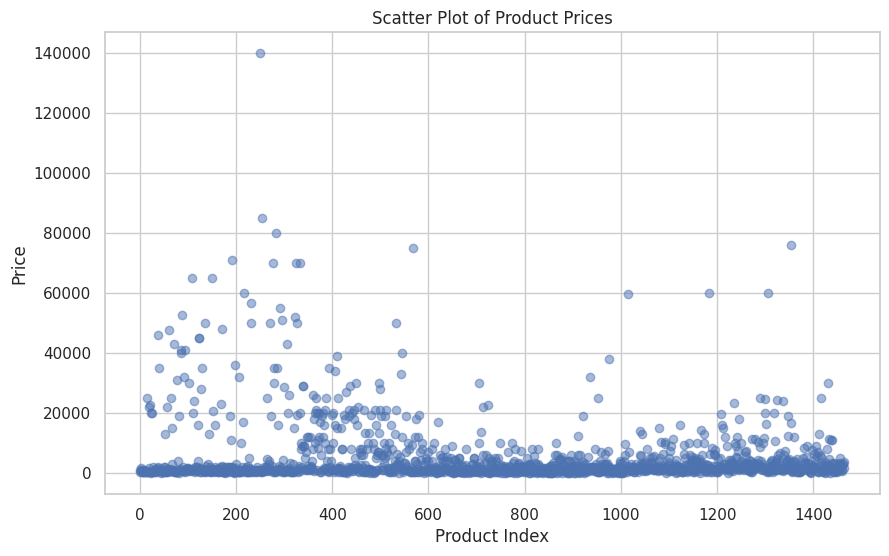

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['actual_price'], alpha=0.5)
plt.title('Scatter Plot of Product Prices')
plt.xlabel('Product Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Q2 What is the average rating across different product categories?


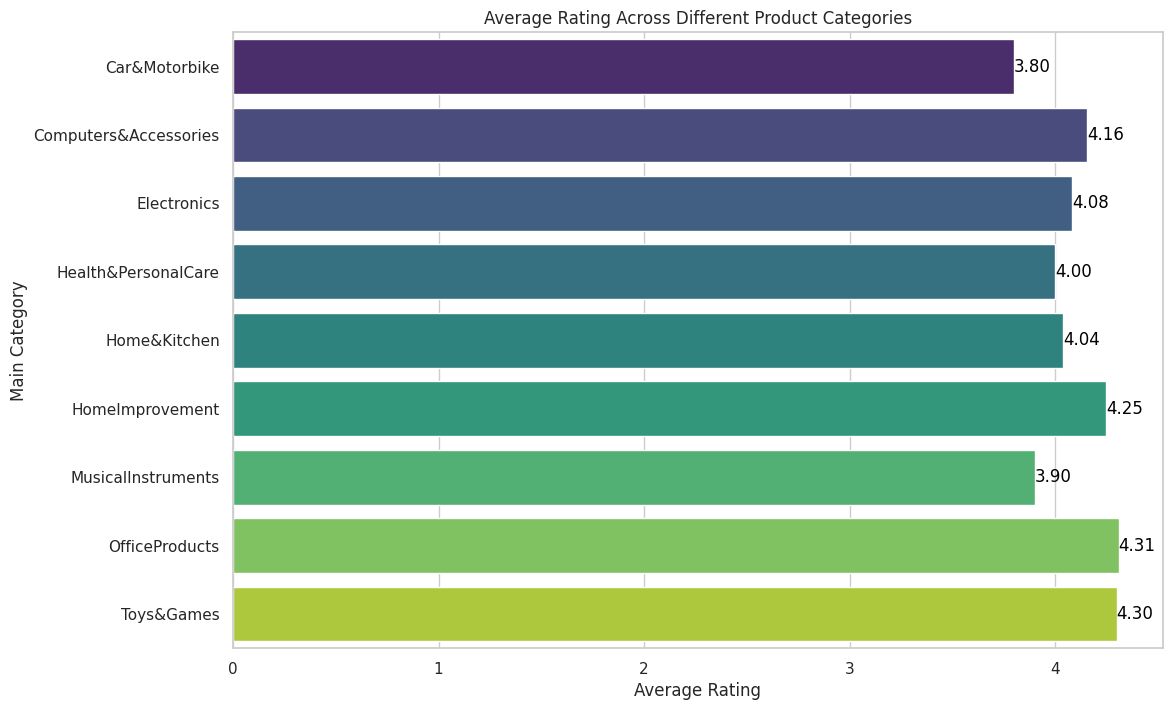

In [25]:
avg_ratings = df.groupby('main_category')['rating'].mean().reset_index()
avg_ratings.columns = ['main_category', 'Average Rating']

plt.figure(figsize=(12, 8))
sns.barplot(x='Average Rating', y='main_category', data=avg_ratings, palette='viridis')

# Adding data labels
for index, value in enumerate(avg_ratings['Average Rating']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.title('Average Rating Across Different Product Categories')
plt.xlabel('Average Rating')
plt.ylabel('Main Category')
plt.show()



Almost all of the categories have good rating of above 4, but there are two categories Musical Instruments, Cars & Motorbike having below 4


Q3 Is there a correlation between discount percentage and product rating?


Correlation between discount percentage and rating: -0.16


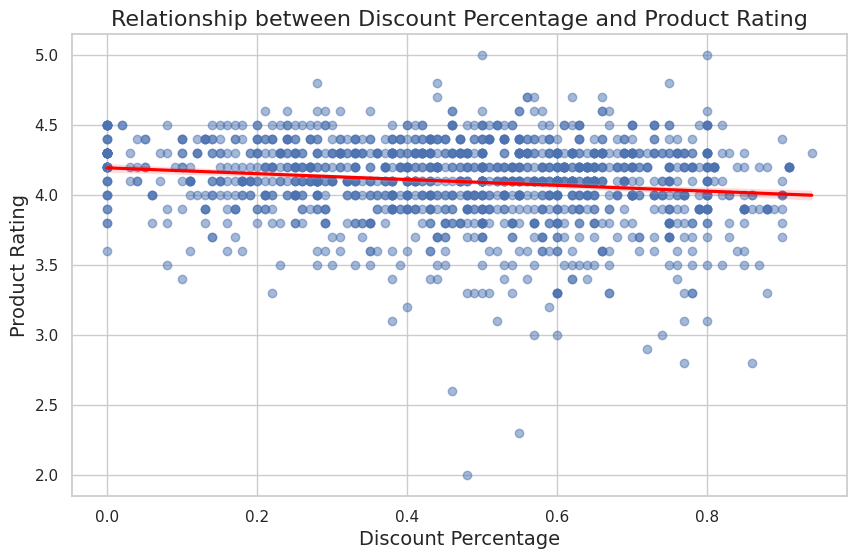

In [26]:
# Calculate the Pearson correlation coefficient
correlation = df['discount_percentage'].corr(df['rating'])
print(f'Correlation between discount percentage and rating: {correlation:.2f}')

# Plot a scatter plot with a regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_percentage', y='rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Set the title and labels
plt.title('Relationship between Discount Percentage and Product Rating', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=14)
plt.ylabel('Product Rating', fontsize=14)

# Show the plot
plt.show()

Q4 What are the top 5 most reviewed products, and what insights do their reviews offer?

In [36]:
top_5_most_reviewed = df.sort_values(by='rating_count', ascending=False).head(5)

for index, row in top_5_most_reviewed.iterrows():
    print(f"Brand: {row['Brand_name']}")
    print(f"Product: {row['product_name']}")
    print(f"Category: {row['main_category']}")
    print(f"Sub-Category: {row['sub_category']} ")
    print(f"Total Reviews: {row['rating_count']}")
    print(f"Rating: {row['rating']}\n")

Brand: AmazonBasics
Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
Category: Electronics
Sub-Category: HDMICables 
Total Reviews: 426973.0
Rating: 4.4

Brand: Amazon
Product: Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black
Category: Electronics
Sub-Category: HDMICables 
Total Reviews: 426973.0
Rating: 4.4

Brand: Amazon
Product: Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
Category: Electronics
Sub-Category: HDMICables 
Total Reviews: 426973.0
Rating: 4.4

Brand: AmazonBasics
Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
Category: Electronics
Sub-Category: HDMICables 
Total Reviews: 426972.0
Rating: 4.4

Brand: boAt
Product: boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)
Category: Electronics
Sub-Category: In-Ear 
Total Reviews: 363713.0
Rating: 4.1



 Top 5 Most Reviewed Categories are Electronics in which top 4 are HDMI Cables

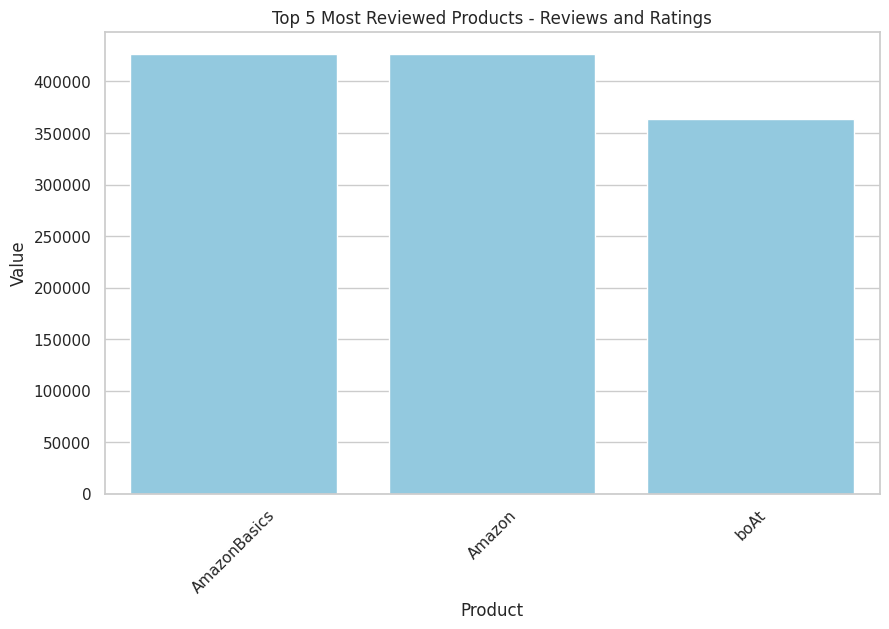

In [39]:
df['Brand_name'] = df['product_name'].astype(str).str.split(' ').str[0]
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand_name', y='rating_count', data=top_5_most_reviewed, color='skyblue')
plt.title('Top 5 Most Reviewed Products - Reviews and Ratings')
plt.xlabel('Product')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Q5 Are certain product categories more frequently discounted?


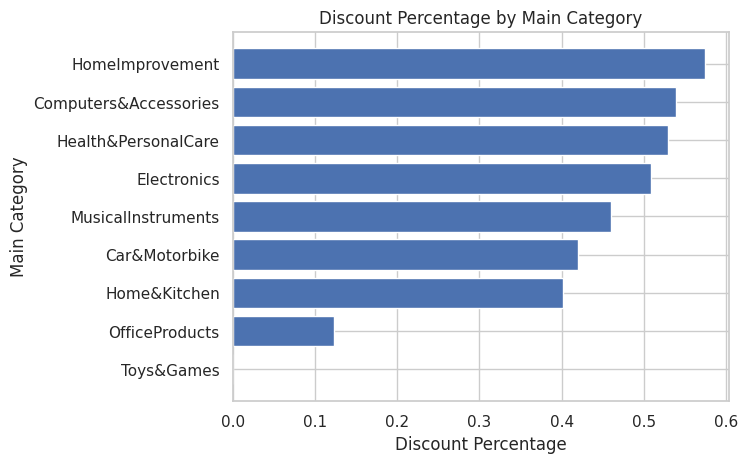

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.123548
2           Home&Kitchen                  0.401205
3          Car&Motorbike                  0.420000
4     MusicalInstruments                  0.460000
5            Electronics                  0.508289
6    Health&PersonalCare                  0.530000
7  Computers&Accessories                  0.539202
8        HomeImprovement                  0.575000


In [40]:
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})

print(table)

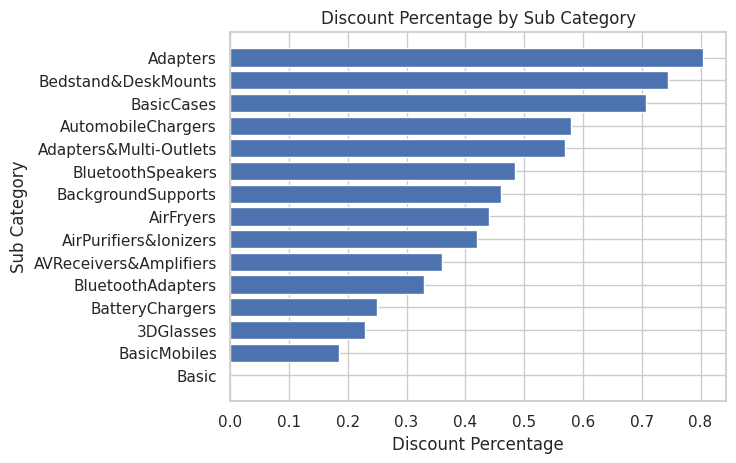

              Sub Category  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                  0.185556
2                3DGlasses                  0.230000
3          BatteryChargers                  0.250000
4        BluetoothAdapters                  0.330000
5   AVReceivers&Amplifiers                  0.360000
6    AirPurifiers&Ionizers                  0.420000
7                AirFryers                  0.440000
8       BackgroundSupports                  0.460000
9        BluetoothSpeakers                  0.485000
10  Adapters&Multi-Outlets                  0.570000
11      AutomobileChargers                  0.580000
12              BasicCases                  0.707500
13     Bedstand&DeskMounts                  0.745000
14                Adapters                  0.803333


In [41]:
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Discount Percentage by Sub Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.show()

table = pd.DataFrame({'Sub Category': mean_discount_by_sub_category.index, 'Mean Discount Percentage': mean_discount_by_sub_category.values})

print(table)

Q6 Do higher-priced products tend to receive higher ratings?


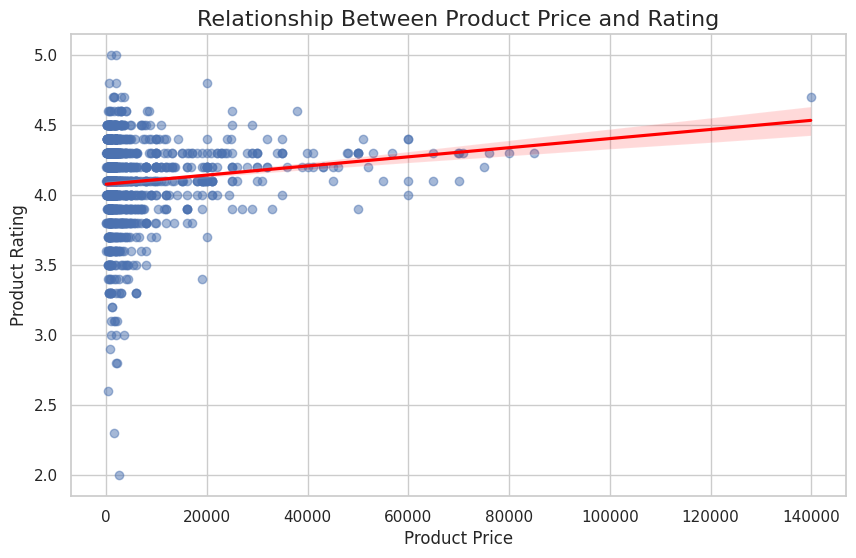

In [43]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='actual_price', y='rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Adding title and labels
plt.title('Relationship Between Product Price and Rating', fontsize=16)
plt.xlabel('Product Price', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)

plt.grid(True)
plt.show()


Q7 Is there a relationship between description length and price or rating?


In [44]:
# Create a new column for description length
df['description_length'] = df['review_content'].apply(len)


In [45]:
price_correlation = df['description_length'].corr(df['actual_price'])
rating_correlation = df['description_length'].corr(df['rating'])

print(f"Correlation between description length and price: {price_correlation:.2f}")
print(f"Correlation between description length and rating: {rating_correlation:.2f}")


Correlation between description length and price: 0.30
Correlation between description length and rating: 0.08


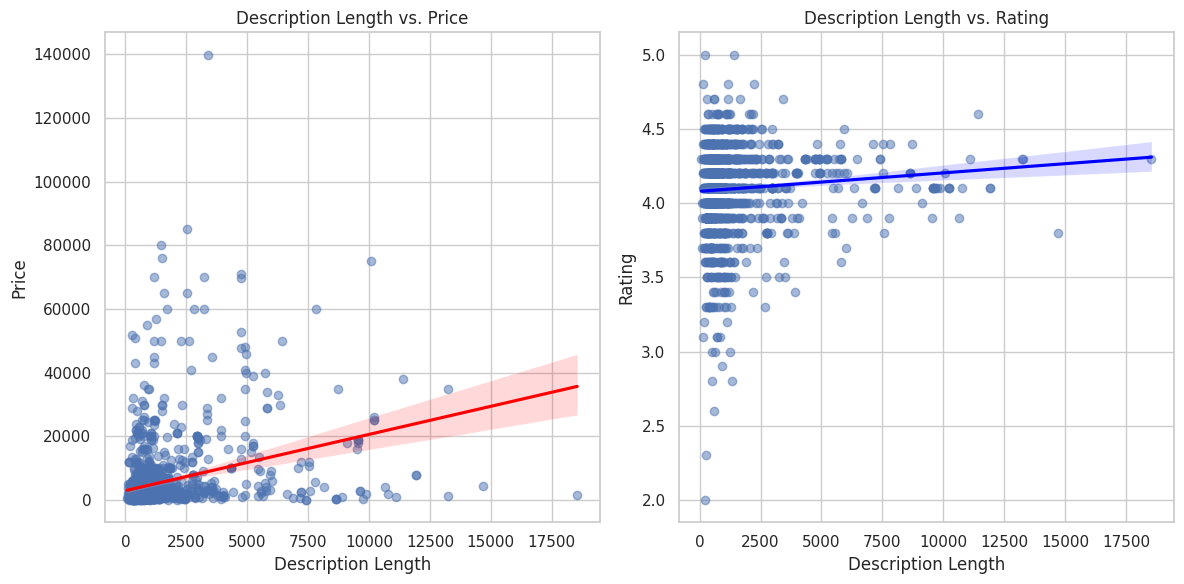

In [46]:
plt.figure(figsize=(12, 6))

# Scatter plot with regression line for description length vs. price
plt.subplot(1, 2, 1)
sns.regplot(x='description_length', y='actual_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Description Length vs. Price')
plt.xlabel('Description Length')
plt.ylabel('Price')

# Scatter plot with regression line for description length vs. rating
plt.subplot(1, 2, 2)
sns.regplot(x='description_length', y='rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Description Length vs. Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()


Description Length and Price (0.30): Positive Correlation: There is a moderate positive correlation between description length and price. This suggests that, generally, products with longer descriptions tend to have higher prices. However, the correlation is not very strong, indicating that while there is some relationship, it is not the primary factor driving price differences.

Description Length and Rating (0.08): Weak Positive Correlation: The very low positive correlation between description length and rating indicates that there is almost no relationship between the length of the description and the product rating. Longer descriptions do not significantly correlate with higher or lower ratings.



Q8 How do ratings differ between products with high and low review counts?


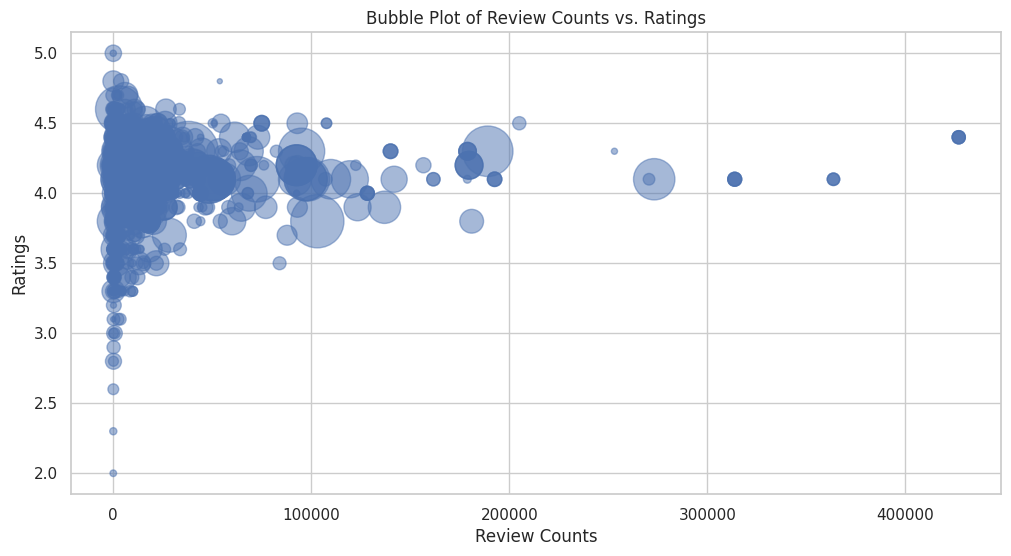

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(df['rating_count'], df['rating'], s=df['description_length'] / 10, alpha=0.5)
plt.title('Bubble Plot of Review Counts vs. Ratings')
plt.xlabel('Review Counts')
plt.ylabel('Ratings')
plt.show()

Insights like these can help businesses focus on improving the quality of their products and enhancing the overall customer experience. It's important to keep track of customer feedback to identify areas for improvement and continue to meet their needs and expectations.

Q9 Are there any discernible seasonal sales or pricing trends?

No columns regarding time series

Q 10 Are there common patterns in products receiving negative reviews?


In [48]:
# Define negative review threshold
negative_rev = 2

# Filter products with negative reviews
negative_reviews_df = df[df['rating'] <= negative_rev]

In [49]:
# Summary statistics for products with negative reviews
negative_summary = negative_reviews_df.describe(include='all')
print(negative_summary)


        product_id                                       product_name  \
count            1                                                  1   
unique           1                                                  1   
top     B0BPJBTB3F  Khaitan ORFin Fan heater for Home and kitchen-...   
freq             1                                                  1   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

                                                 category  discounted_price  \
count                                       

In [50]:
# Distribution of categories for products with negative reviews
category_distribution = negative_reviews_df['main_category'].value_counts()
print(category_distribution)

# Distribution of price ranges for products with negative reviews
price_bins = pd.cut(negative_reviews_df['actual_price'], bins=[0, 50, 100, 200, 500, 1000, 5000])
price_distribution = price_bins.value_counts()
print(price_distribution)

main_category
Home&Kitchen    1
Name: count, dtype: int64
actual_price
(1000, 5000]    1
(0, 50]         0
(50, 100]       0
(100, 200]      0
(200, 500]      0
(500, 1000]     0
Name: count, dtype: int64


In One category Home&Kitchen , sub_category Home Appliance there is a negative review of 1


Q 11 Can products be clustered based on features and pricing?


Q12 How does the discount percentage vary across different brands?


In [62]:
df['discount_percentage'] = df['discount_percentage'] / 1000
df['discount_percentage']

0       64.0
1       43.0
2       90.0
3       53.0
4       61.0
        ... 
1460    59.0
1461    25.0
1462    28.0
1463    26.0
1464    22.0
Name: discount_percentage, Length: 1463, dtype: float64

         Brand_name          main_category  discount_percentage
0            !!1000           Home&Kitchen                 51.0
1    !!HANEUL!!1000           Home&Kitchen                 44.0
2           10WeRun            Electronics                 74.0
3               10k            Electronics                 58.0
4                3M           Home&Kitchen                 21.0
..              ...                    ...                  ...
478           pTron            Electronics                 76.0
479          realme  Computers&Accessories                 38.0
480          realme            Electronics                 21.0
481             rts  Computers&Accessories                 94.0
482           tizum            Electronics                 44.0

[483 rows x 3 columns]
    Brand_name          main_category  discount_percentage
481        rts  Computers&Accessories                 94.0
223    LAPSTER            Electronics                 90.0
371   Silicone            Elect

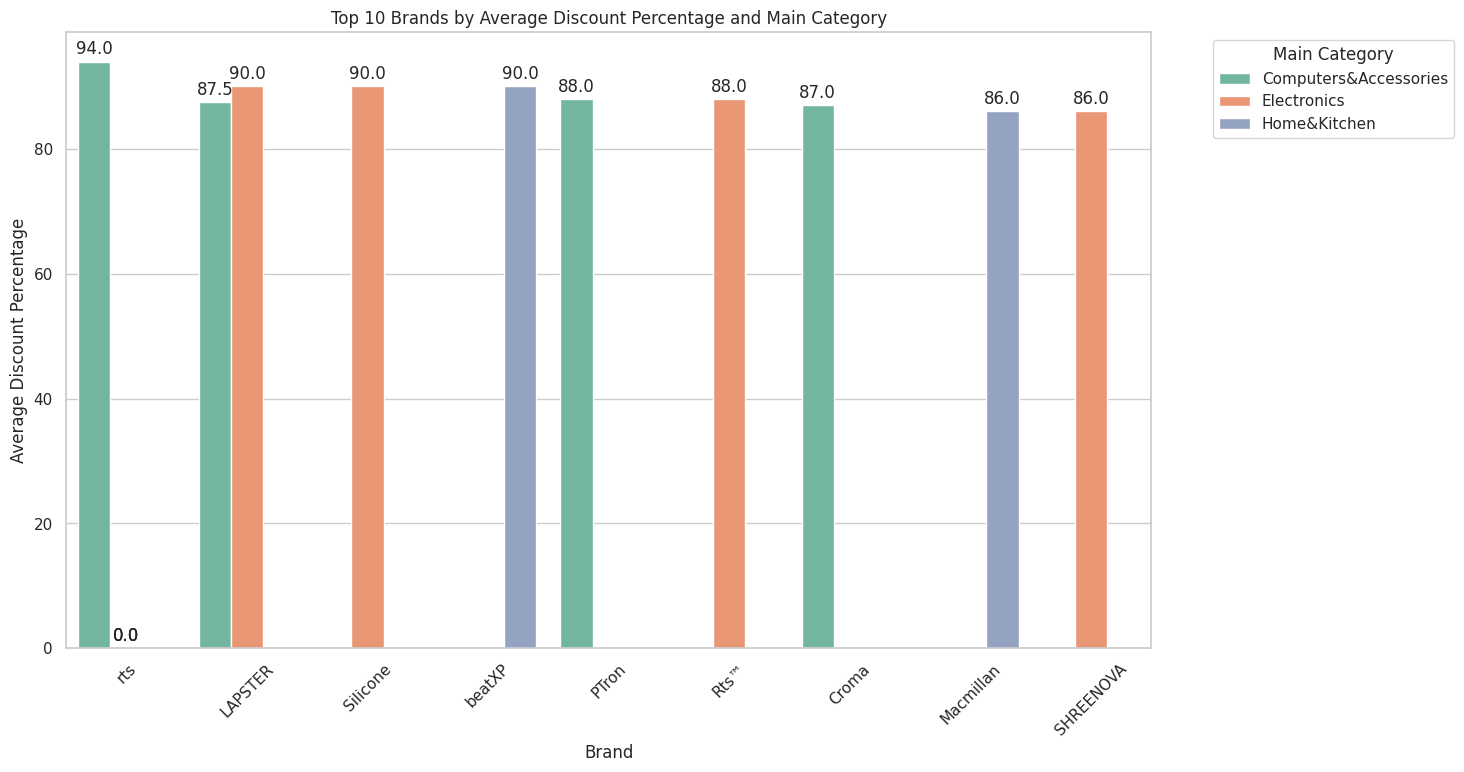

In [63]:
# Calculate average discount percentage per brand and main category
brand_category_discount = df.groupby(['Brand_name', 'main_category'])['discount_percentage'].mean().reset_index()

# View the results
print(brand_category_discount)

# Sort by discount percentage and select the top 10
top_10_brand_category = brand_category_discount.nlargest(10, 'discount_percentage')

# View the results
print(top_10_brand_category)

plt.figure(figsize=(14, 8))

# Create a bar plot with Brand_name on x-axis and hue as main_category
barplot = sns.barplot(x='Brand_name', y='discount_percentage', hue='main_category', data=top_10_brand_category, palette='Set2')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),  # Format label with one decimal place
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # X and Y position
                     ha = 'center', va = 'center',   # Horizontal and vertical alignment
                     xytext = (0, 9),  # Offset label above the bar
                     textcoords = 'offset points')

plt.title('Top 10 Brands by Average Discount Percentage and Main Category')
plt.xlabel('Brand')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45)
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Q 13 Is there a relationship between the number of images and sales performance?
 No

Q 14 What are common keywords or phrases in product titles or descriptions?

             word  count
15574         usb   1393
3661        cable   1220
4091     charging    861
15999    warranty    570
6700         fast    568
15348        type    556
3194        black    549
11821       power    548
5499      devices    532
4561   compatible    527


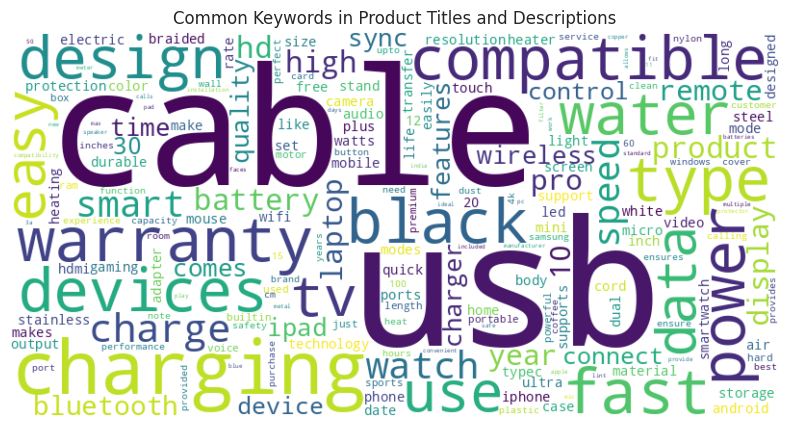

In [65]:
import re
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing to titles and descriptions
df['cleaned_title'] = df['product_name'].apply(preprocess_text)
df['cleaned_description'] = df['about_product'].apply(preprocess_text)

from sklearn.feature_extraction.text import CountVectorizer

# Combine titles and descriptions for analysis
combined_text = df['cleaned_title'].tolist() + df['cleaned_description'].tolist()

# Tokenize and count word frequencies
vectorizer = CountVectorizer(stop_words='english')  # Remove common stop words
X = vectorizer.fit_transform(combined_text)
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# Create a DataFrame with word counts
word_freq = pd.DataFrame({'word': words, 'count': word_counts})
word_freq = word_freq.sort_values(by='count', ascending=False)

print(word_freq.head(10))  # Display top 10 most common words

from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq.set_index('word')['count']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Product Titles and Descriptions')
plt.show()

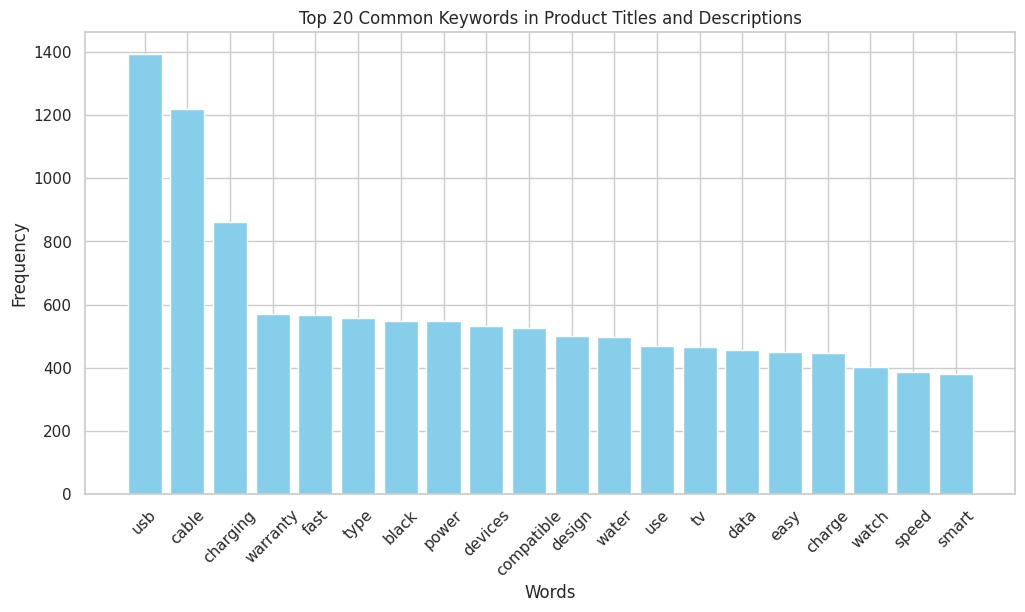

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(word_freq['word'][:20], word_freq['count'][:20], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Common Keywords in Product Titles and Descriptions')
plt.xticks(rotation=45)
plt.show()

Q 15 Are there regional differences in customer behaviour?
 NO

Q 16 Can product rating be predicted based on features and category?

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961906            -0.241969   
actual_price                 0.961906      1.000000            -0.117494   
discount_percentage         -0.241969     -0.117494             1.000000   
rating                       0.121160      0.122522            -0.155224   
rating_count                -0.027261     -0.036137             0.011691   
description_length           0.308895      0.295770            -0.124698   

                       rating  rating_count  description_length  
discounted_price     0.121160     -0.027261            0.308895  
actual_price         0.122522     -0.036137            0.295770  
discount_percentage -0.155224      0.011691           -0.124698  
rating               1.000000      0.102318            0.078073  
rating_count         0.102318      1.000000            0.154420  
description_length   0.078073      0.154420            1.000000  


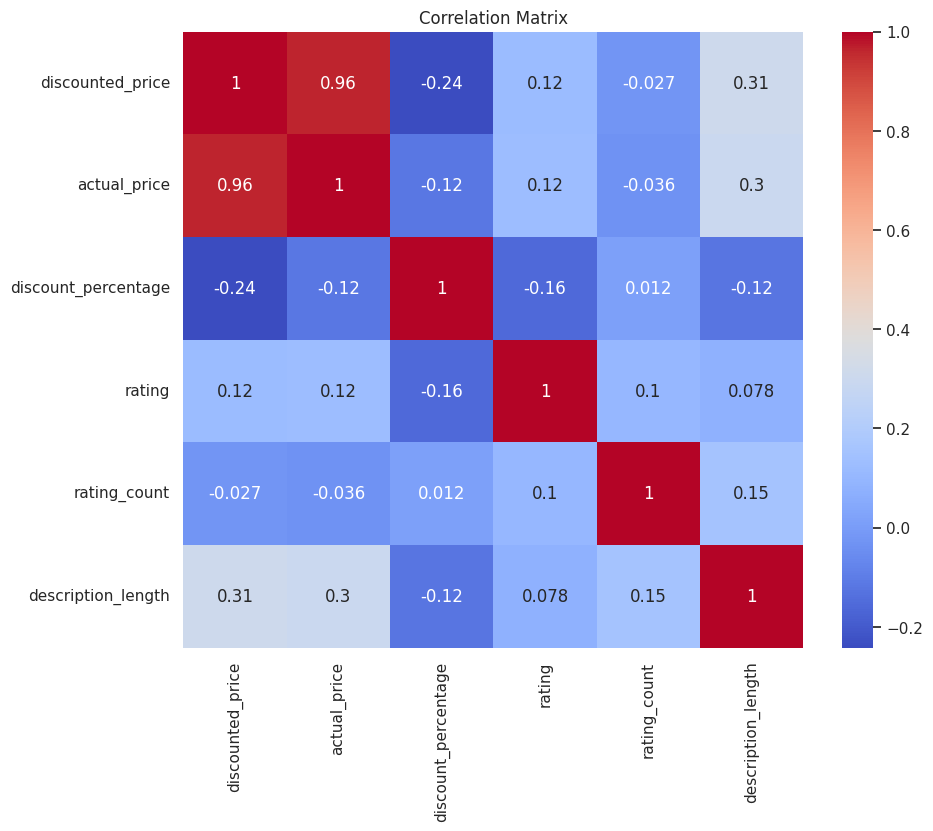

In [67]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Q 17 How can insights from this analysis improve product recommendations?
 **Didn't performed product recommendations**




Q 18 What are the limitations of this dataset and analysis?
**There is no time series data for trends, and sales pattern**

Q 19 What additional data sources could enhance this analysis?
 **DataSet Including Orders could gather more information**

Q 20 How can findings from this EDA inform marketing and pricing strategies?

**Summary and Key Insights**

*   Product Ratings and Discounts:
Amazon's strategy of using discounts appears to be effective in driving customer engagement. However, very high discounts do not necessarily translate to higher customer interaction. Therefore, the most practical and economically efficient approach is to focus on discounting products within the 15 to 25 percent range. This discount range has been observed to attract the highest number of customer ratings, suggesting it is the sweet spot for balancing customer engagement with revenue optimization.

*   Category Performance:
The Electronics category, particularly smartphones, is a crucial driver of sales on Amazon. This segment not only has the most products but also garners significant customer attention and feedback.

*   Customer Priorities:
In the smartphone segment, customers prioritize functionality, camera quality, and battery life. These attributes should be focal points in marketing and product development to align with customer preferences and maintain high satisfaction levels.









